# CS4622 - Machine Learning Lab 01 - Feature Engineering

# Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.decomposition import PCA

In [ ]:
# Loading data
train = pd.read_csv('/content/drive/MyDrive/train.csv')
valid = pd.read_csv('/content/drive/MyDrive/valid.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [ ]:
train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28040.000000,28520.000000,28520.000000
mean,-0.225478,-0.616421,-0.212878,0.336330,0.105467,-0.339634,-0.201756,0.742262,0.942325,-1.957584,...,-0.028098,0.296340,1.724439,-1.476765,0.687445,-1.563062,30.498843,27.975107,0.799299,5.997125
std,0.990632,1.005573,1.075468,1.248919,0.831132,1.073267,0.943505,1.055721,0.940459,0.876939,...,0.989497,1.173378,0.968611,1.032811,1.028328,1.243758,17.328389,5.735913,0.400532,2.375567
min,-4.023911,-5.582544,-4.679888,-4.284380,-3.010300,-5.034355,-4.355222,-3.806574,-2.922614,-5.203347,...,-3.679602,-3.905801,-3.301683,-5.490267,-3.810144,-6.056032,1.000000,22.000000,0.000000,0.000000
25%,-0.869656,-1.287018,-0.913419,-0.478661,-0.437171,-1.075753,-0.823699,0.064072,0.298269,-2.556436,...,-0.692262,-0.550897,1.121631,-2.130906,-0.008394,-2.404028,15.000000,25.000000,1.000000,6.000000
50%,-0.190790,-0.609782,-0.218800,0.295881,0.117310,-0.329571,-0.193263,0.755193,0.940786,-1.949847,...,-0.018218,0.295523,1.783432,-1.449978,0.639575,-1.650610,30.000000,27.000000,1.000000,6.000000
75%,0.457509,0.063174,0.490262,1.119242,0.657941,0.393339,0.417146,1.461846,1.579200,-1.345999,...,0.644112,1.128566,2.383575,-0.799414,1.347263,-0.805710,46.000000,30.000000,1.000000,6.000000
max,4.322171,3.876604,4.267163,5.828656,3.884939,3.890622,3.799406,4.817545,4.615069,1.147192,...,3.915582,4.458014,5.261775,2.861117,5.531152,3.338544,60.000000,61.000000,1.000000,13.000000


In [ ]:
# Looking for missing values in train data set
train.isna().sum()

feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_256      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 260, dtype: int64

In [ ]:
# Looking for missing values in valid data set
valid.isna().sum()

feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_256     0
label_1         0
label_2        14
label_3         0
label_4         0
Length: 260, dtype: int64

`label_2` contains missing values. Therefore, we need to handle those missing values in label_2 modelling.

In [ ]:
X = train.iloc[:, : -4]

In [ ]:
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,2.029255,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.970327,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606


In [ ]:
# KNN Classification Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knn_classification(k, X_train, y_train, X_valid, y_valid):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_valid)
  accuracy = accuracy_score(y_valid, y_pred)
  return accuracy

In [ ]:
# SVM Classification Model
from sklearn import svm
from sklearn import metrics

# clf = svm.SVC(kernel='linear', class_vector="balanced")
# print(metrics.confussion_matrix(y_valid, y_pred))

def svm_classification(X_train, y_train, X_valid, y_valid):
  clf = svm.SVC(kernel='linear')
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_valid)
  accuracy = accuracy_score(y_valid, y_pred)
  return accuracy



In [ ]:
# Function to write to CSV
def create_csv(x, y_before_predict, y_after_predict, label_name):
    output_filename = f"/content/drive/My Drive/190257C_{label_name}.csv"
    combined_data = pd.DataFrame()

    combined_data["Predicted labels before feature engineering"] = y_before_predict
    combined_data["Predicted labels after feature engineering"] = y_after_predict
    combined_data["No of new features"] = [len(x.columns)] * len(combined_data)

    i = 0;
    while i < len(x.columns):
        column_name = x.columns[i]
        combined_data[f"new_feature_{i+1}"] = x[column_name]
        i += 1

    while i < 256:
        combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
        i += 1

    combined_data.to_csv(output_filename, index=False)

# Modeling `label_1`: Speaker ID

In [ ]:
# Split X and and label_1
X_label_1 = train.iloc[:, : -4]
y_label_1 = train['label_1']

X_valid_label_1 = valid.iloc[:, : -4]
y_valid_label_1 = valid['label_1']

X_test_label_1 = test.copy()
X_test_label_1 = X_test_label_1.iloc[:, : -4]

In [ ]:
X_label_1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,2.029255,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.970327,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606


In [ ]:
y_label_1.head()

0    45
1    45
2    45
3    45
4    45
Name: label_1, dtype: int64

<Axes: >

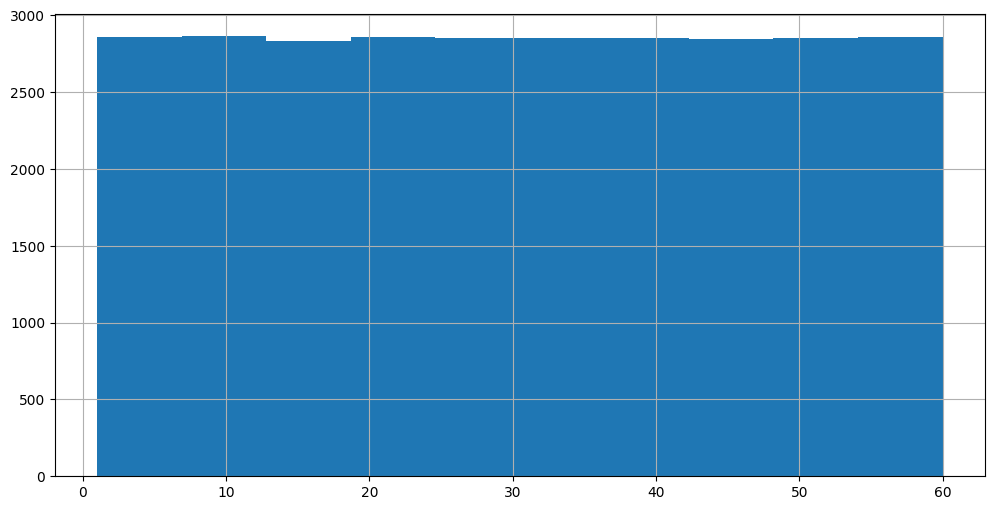

In [ ]:
plt.figure(figsize=(12, 6))
y_label_1.hist()

Check accuracy before any feature selection

In [ ]:
# KNN Classification Model
k=7
knn_model_label_1 = KNeighborsClassifier(n_neighbors=k)
knn_model_label_1.fit(X_label_1, y_label_1)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_label_1 = knn_model_label_1.predict(X_valid_label_1)
accuracy = accuracy_score(y_valid_label_1, y_pred_label_1)
print("Accuracy: ", accuracy)

Accuracy:  0.9866666666666667


In [ ]:
# Predict label 1 before feature engineering for test dataset
y_pred_label_1_before = knn_model_label_1.predict(X_test_label_1)

Feature selection

In [ ]:
# Check for columns with low variance
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0.2)
var_thres.fit(X_label_1)

low_variance_columns = [column for column in X_label_1.columns if column not in X_label_1.columns[var_thres.get_support()]]
print(len(low_variance_columns))

0


No low variance columns detected. Check for mutual information.

In [ ]:
# Check Mutual Information
from sklearn.feature_selection import mutual_info_classif, SelectPercentile
mutual_info = mutual_info_classif(X_label_1, y_label_1)
mutual_info

array([0.12890116, 0.17711203, 0.22203831, 0.2170613 , 0.10536894,
       0.16077365, 0.13555125, 0.24371074, 0.15132186, 0.10339762,
       0.22358189, 0.15567081, 0.15850326, 0.16205122, 0.33081514,
       0.189876  , 0.16841021, 0.13367933, 0.20331324, 0.13525656,
       0.2178336 , 0.08348376, 0.20387493, 0.2602778 , 0.14579326,
       0.24355937, 0.16688325, 0.23801321, 0.19404619, 0.20196015,
       0.08504131, 0.10595158, 0.19236933, 0.1412423 , 0.38037081,
       0.42963628, 0.18354975, 0.19133973, 0.16948954, 0.17458062,
       0.15971141, 0.21802373, 0.17760428, 0.54384424, 0.1863102 ,
       0.26174991, 0.15232846, 0.08735876, 0.14709247, 0.18221203,
       0.20954954, 0.10350365, 0.15110607, 0.19843578, 0.14564111,
       0.15761934, 0.19122821, 0.21755326, 0.17913853, 0.31600375,
       0.13301357, 0.14778116, 0.24936491, 0.20218277, 0.10531672,
       0.15146162, 0.12016409, 0.14484814, 0.11911961, 0.17294436,
       0.13754749, 0.15723689, 0.15407792, 0.17437758, 0.18671

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_label_1.columns
mutual_info.sort_values(ascending=False)

feature_44     0.543844
feature_233    0.506970
feature_36     0.429636
feature_35     0.380371
feature_143    0.378063
                 ...   
feature_252    0.097470
feature_247    0.096912
feature_48     0.087359
feature_31     0.085041
feature_22     0.083484
Length: 256, dtype: float64

<Axes: >

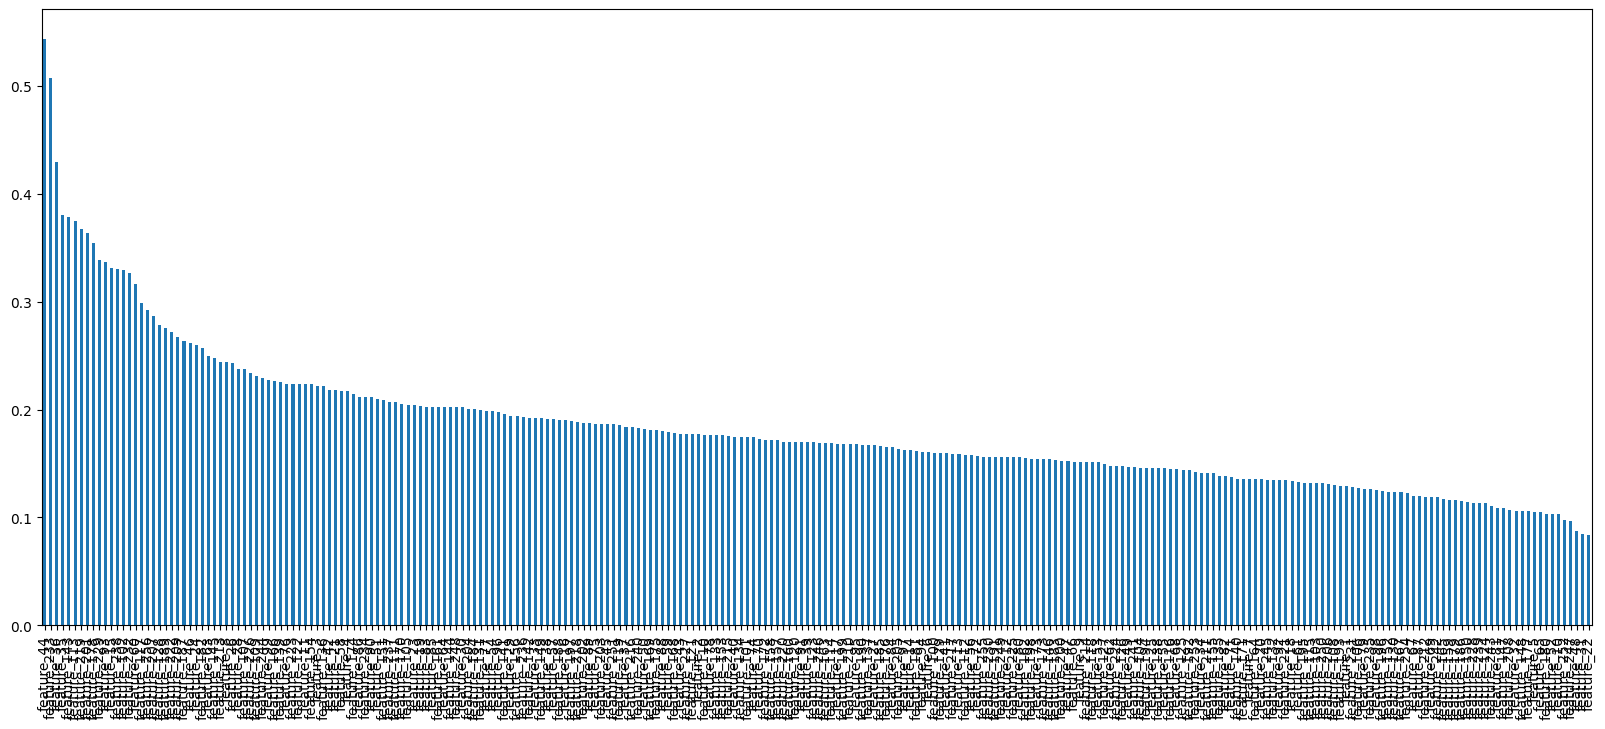

In [ ]:
# Plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
selected_top_columns = SelectPercentile(mutual_info_classif, percentile=20)
selected_top_columns.fit(X_label_1, y_label_1)
selected_column_names = X_label_1.columns[selected_top_columns.get_support()]
print(selected_column_names)
print(len(selected_column_names))

Index(['feature_3', 'feature_4', 'feature_8', 'feature_11', 'feature_15',
       'feature_21', 'feature_24', 'feature_26', 'feature_28', 'feature_35',
       'feature_36', 'feature_42', 'feature_44', 'feature_46', 'feature_58',
       'feature_60', 'feature_63', 'feature_76', 'feature_93', 'feature_99',
       'feature_102', 'feature_107', 'feature_109', 'feature_113',
       'feature_117', 'feature_122', 'feature_128', 'feature_136',
       'feature_139', 'feature_143', 'feature_145', 'feature_154',
       'feature_166', 'feature_178', 'feature_182', 'feature_187',
       'feature_189', 'feature_201', 'feature_207', 'feature_209',
       'feature_213', 'feature_219', 'feature_222', 'feature_223',
       'feature_226', 'feature_229', 'feature_232', 'feature_233',
       'feature_238', 'feature_244', 'feature_256'],
      dtype='object')
51


In [ ]:
# Get selected columns from train and valid data sets
X_label_1_new = pd.DataFrame(X_label_1, columns=selected_column_names)
X_valid_label_1_new = pd.DataFrame(X_valid_label_1, columns=selected_column_names)
X_test_label_1_new = pd.DataFrame(X_test_label_1, columns=selected_column_names)

Check accuracy after feature selection

In [ ]:
# Check accuracy again using KNN Classification Model
k=7
knn_model_label_1_new = KNeighborsClassifier(n_neighbors=k)
knn_model_label_1_new.fit(X_label_1_new, y_label_1)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_label_1_new = knn_model_label_1_new.predict(X_valid_label_1_new)
accuracy_new = accuracy_score(y_valid_label_1, y_pred_label_1_new)
print("New Accuracy: ", accuracy_new)

New Accuracy:  0.9666666666666667


In [ ]:
# Predict label 1 after feature engineering for test dataset
y_pred_label_1_after = knn_model_label_1_new.predict(X_test_label_1_new)

write CSV file for label_1

In [ ]:
create_csv(X_test_label_1_new, y_pred_label_1_before, y_pred_label_1_after, "label_1")

<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

# Modeling `label_2`: Speaker Age


Handlig missing values

In [ ]:
train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,-0.133276,1.000378,-0.429316,0.313957,3.004676,-0.430012,-1.406885,1.003829,2.446188,-1.267793,...,0.739990,-1.008707,0.876191,-0.219648,1.413330,-0.943048,39,29.0,1,6
28516,1.422285,-1.332320,-0.146487,0.261297,0.424878,-0.724837,0.751165,-1.497327,0.764382,-1.836306,...,-0.188780,0.362157,1.592062,-1.854311,1.864250,-2.102834,39,29.0,1,6
28517,1.133093,-0.632685,-0.055843,0.771494,1.286218,-0.022827,0.100600,0.701797,1.211175,-1.189144,...,1.118152,-2.058771,2.761125,0.410838,0.348411,-1.981375,39,29.0,1,6
28518,-0.994910,-0.621460,-0.205676,-0.684337,1.090212,-1.194920,-0.032449,-0.441138,1.198641,-2.830740,...,0.704228,-0.434955,1.891357,-1.680577,-0.767429,-1.770626,39,29.0,1,6


In [ ]:
# Remove label_2 missing rows
label_2 = train[train['label_2'].notna()]
label_2_valid = valid[valid['label_2'].notna()]

In [ ]:
label_2

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
480,-2.133907,-1.851185,-0.401913,0.579630,0.701037,-0.212690,-0.708243,3.016801,0.464313,-0.825300,...,-0.598476,2.794869,1.049926,-2.829166,0.908335,-1.295668,5,25.0,1,6
481,-0.404385,-0.836757,0.762689,1.637213,0.665621,0.625971,0.262635,1.408128,0.776417,-2.443906,...,1.234601,0.764250,1.848260,-1.138066,-0.143287,-1.997515,5,25.0,1,6
482,-1.642496,-1.278682,0.164281,1.371167,0.258172,-0.896479,-0.051402,0.623235,0.367427,-1.211149,...,0.269733,1.143640,1.827864,-2.056184,-0.070624,-2.222077,5,25.0,1,6
483,-0.191927,-2.451684,0.547922,-0.041680,0.804643,-0.324783,0.806728,1.507769,-0.657439,-0.784736,...,1.085195,-1.203888,2.832388,-1.943990,0.208316,-2.421425,5,25.0,1,6
484,-0.510969,-0.781623,-1.478504,0.794873,0.354653,0.268014,-1.677308,1.627065,0.985870,-2.165971,...,-0.820887,1.300054,2.499395,-1.692642,0.563708,-0.975423,5,25.0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,-0.133276,1.000378,-0.429316,0.313957,3.004676,-0.430012,-1.406885,1.003829,2.446188,-1.267793,...,0.739990,-1.008707,0.876191,-0.219648,1.413330,-0.943048,39,29.0,1,6
28516,1.422285,-1.332320,-0.146487,0.261297,0.424878,-0.724837,0.751165,-1.497327,0.764382,-1.836306,...,-0.188780,0.362157,1.592062,-1.854311,1.864250,-2.102834,39,29.0,1,6
28517,1.133093,-0.632685,-0.055843,0.771494,1.286218,-0.022827,0.100600,0.701797,1.211175,-1.189144,...,1.118152,-2.058771,2.761125,0.410838,0.348411,-1.981375,39,29.0,1,6
28518,-0.994910,-0.621460,-0.205676,-0.684337,1.090212,-1.194920,-0.032449,-0.441138,1.198641,-2.830740,...,0.704228,-0.434955,1.891357,-1.680577,-0.767429,-1.770626,39,29.0,1,6


In [ ]:
# Split X and and label_2
X_label_2 = label_2.iloc[:, : -4]
y_label_2 = label_2['label_2']

X_valid_label_2 = label_2_valid.iloc[:, : -4]
y_valid_label_2 = label_2_valid['label_2']

X_test_label_2 = test.copy()
X_test_label_2 = X_test_label_2.iloc[:, : -4]

In [ ]:
# Look y_label_2 after removing the missing values
y_label_2

480      25.0
481      25.0
482      25.0
483      25.0
484      25.0
         ... 
28515    29.0
28516    29.0
28517    29.0
28518    29.0
28519    29.0
Name: label_2, Length: 28040, dtype: float64

In [ ]:
# Check is there any missing values
y_label_2.isna().sum()

0

<Axes: >

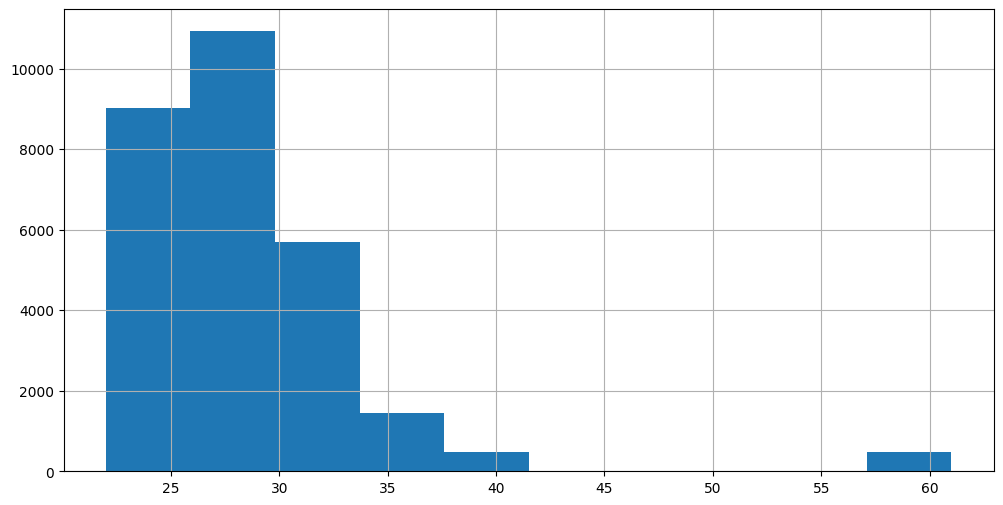

In [ ]:
plt.figure(figsize=(12, 6))
y_label_2.hist()

Check accuracy before feature selection

In [ ]:
# KNN Classification Model
k=7
knn_model_label_2 = KNeighborsClassifier(n_neighbors=k)
knn_model_label_2.fit(X_label_2, y_label_2)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_label_2 = knn_model_label_2.predict(X_valid_label_2)
accuracy = accuracy_score(y_valid_label_2, y_pred_label_2)
print("Accuracy: ", accuracy)

Accuracy:  0.9877717391304348


In [ ]:
X_test_label_2

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,1.670388,-0.355608,-0.342747,-0.102831,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,1.136570,0.826741,-0.371280,-1.492272,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,0.343188,-0.243809,0.462302,-1.511495,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,3.057573,-0.632902,1.511204,-0.658826,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,1.217447,-0.374313,1.280207,-1.546299,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-0.520450,-1.231046,0.823668,-0.786737,-0.544497,-1.154617,0.334333,1.775682,1.523353,-1.914443,...,0.604934,-1.514841,1.343096,-1.258448,-0.600713,-0.430942,0.035674,-2.600120,0.669488,-2.029166
746,-0.512158,-2.199031,2.003965,-1.231407,-0.056881,-0.851074,0.856941,1.686686,1.430602,-1.316440,...,0.399647,-1.177832,-0.248752,0.759927,-0.219005,1.678616,1.361874,-3.596900,2.411123,-0.136058
747,0.160726,-1.636096,-1.372266,1.134842,0.232438,0.352374,-1.142442,0.364165,1.111855,-2.124050,...,-0.017546,-0.098299,0.910971,-2.589724,2.165812,-2.229485,2.895952,-0.350322,-0.400452,-1.012769
748,0.546223,-0.257980,2.767929,0.483799,1.346494,-0.963523,-0.712168,1.606215,0.785446,-0.188702,...,-0.372218,0.018880,-0.752377,-1.266369,0.468936,-1.298011,1.695302,-0.436444,0.212078,-2.275145


In [ ]:
# Predict label 2 before feature engineering for test dataset
y_pred_label_2_before = knn_model_label_2.predict(X_test_label_2)

Use Principal component analysis

In [ ]:
pca_label_2 = PCA(n_components=0.90, svd_solver='full')
pca_label_2.fit(X_label_2)
X_train_trf_label_2 = pd.DataFrame(pca_label_2.transform(X_label_2))
X_valid_trf_label_2 = pd.DataFrame(pca_label_2.transform(X_valid_label_2))
X_test_trf_label_2 = pd.DataFrame(pca_label_2.transform(X_test_label_2))
X_train_trf_label_2.shape

(28040, 48)

Check accuracy agian after principle component analysis

In [ ]:
# Check accuracy again using KNN Classification Model
k=7
knn_model_label_2_new = KNeighborsClassifier(n_neighbors=k)
knn_model_label_2_new.fit(X_train_trf_label_2, y_label_2)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_label_2_new = knn_model_label_2_new.predict(X_valid_trf_label_2)
accuracy_new = accuracy_score(y_valid_label_2, y_pred_label_2_new)
print("New Accuracy: ", accuracy_new)

New Accuracy:  0.9809782608695652


In [ ]:
# Predict label 2 after feature engineering for test dataset
y_pred_label_2_after = knn_model_label_2_new.predict(X_test_trf_label_2)

write CSV file for label_2

In [ ]:
create_csv(X_test_trf_label_2, y_pred_label_2_before, y_pred_label_2_after, "label_2")

<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

# Modeling `label_3`: Speaker Gender

In [ ]:
# Split X and and label_3
X_label_3 = train.iloc[:, : -4]
y_label_3 = train['label_3']

X_valid_label_3 = valid.iloc[:, : -4]
y_valid_label_3 = valid['label_3']

X_test_label_3 = test.copy()
X_test_label_3 = X_test_label_3.iloc[:, : -4]

In [ ]:
y_label_3.value_counts()

1    22796
0     5724
Name: label_3, dtype: int64

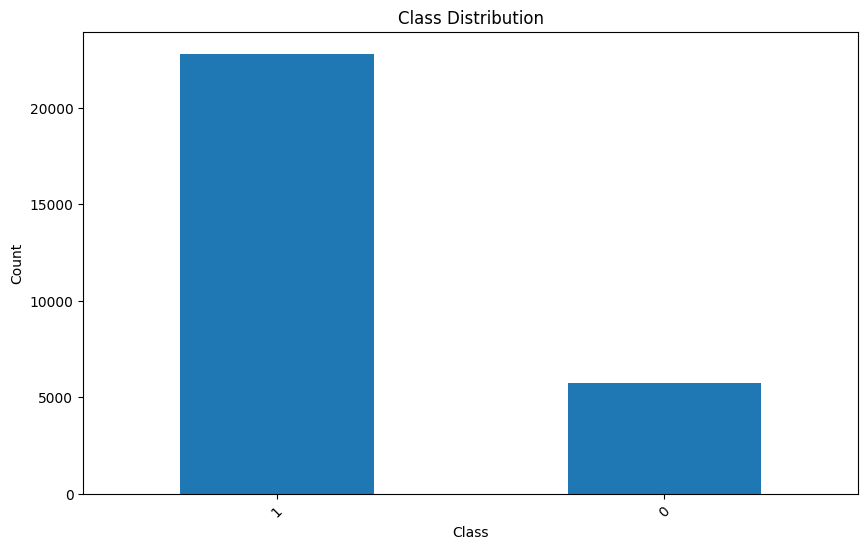

In [ ]:
class_counts = y_label_3.value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Oversampling usign SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE for oversampling
smote_label_3 = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled_label_3, y_resampled_label_3 = smote_label_3.fit_resample(X_label_3, y_label_3)

# Visualize the class distribution after oversampling
print("Class distribution before oversampling:", Counter(y_label_3))
print("Class distribution after oversampling:", Counter(y_resampled_label_3))

Class distribution before oversampling: Counter({1: 22796, 0: 5724})
Class distribution after oversampling: Counter({1: 22796, 0: 22796})


Check accuracy before any feature selection

In [ ]:
# KNN Classification Model
k=7
knn_model_label_3 = KNeighborsClassifier(n_neighbors=k)
knn_model_label_3.fit(X_resampled_label_3, y_resampled_label_3)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_label_3 = knn_model_label_3.predict(X_valid_label_3)
accuracy = accuracy_score(y_valid_label_3, y_pred_label_3)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [ ]:
# Predict label 3 before feature engineering for test dataset
y_pred_label_3_before = knn_model_label_3.predict(X_test_label_3)

Use Principal component analysis

In [ ]:
from sklearn.decomposition import PCA

pca_label_3 = PCA(n_components=0.75, svd_solver='full')
pca_label_3.fit(X_resampled_label_3)
X_train_trf_label_3 = pd.DataFrame(pca_label_3.transform(X_resampled_label_3))
X_valid_trf_label_3 = pd.DataFrame(pca_label_3.transform(X_valid_label_3))
X_test_trf_label_3 = pd.DataFrame(pca_label_3.transform(X_test_label_3))
X_train_trf_label_3.shape

(45592, 22)

Check accuracy after feature selection

In [ ]:
# Check accuracy again using KNN Classification Model
k=7
knn_model_label_3_new = KNeighborsClassifier(n_neighbors=k)
knn_model_label_3_new.fit(X_train_trf_label_3, y_resampled_label_3)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_label_3_new = knn_model_label_3_new.predict(X_valid_trf_label_3)
accuracy_new = accuracy_score(y_valid_label_3, y_pred_label_3_new)
print("New Accuracy: ", accuracy_new)

New Accuracy:  1.0


In [ ]:
# Predict label 3 after feature engineering for test dataset
y_pred_label_3_after = knn_model_label_3_new.predict(X_test_trf_label_3)

write CSV file for label_3

In [ ]:
create_csv(X_test_trf_label_3, y_pred_label_3_before, y_pred_label_3_after, "label_3")

<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

# Modeling `label_4`: Speaker Accent

In [ ]:
# Split X and and label_3
X_label_4 = train.iloc[:, : -4]
y_label_4 = train['label_4']

X_valid_label_4 = valid.iloc[:, : -4]
y_valid_label_4 = valid['label_4']

X_test_label_4 = test.copy()
X_test_label_4 = X_test_label_4.iloc[:, : -4]

In [ ]:
y_label_4.value_counts()

6     19938
2      1449
0       955
12      954
7       938
13      482
1       481
11      480
10      480
3       479
5       478
9       472
4       469
8       465
Name: label_4, dtype: int64

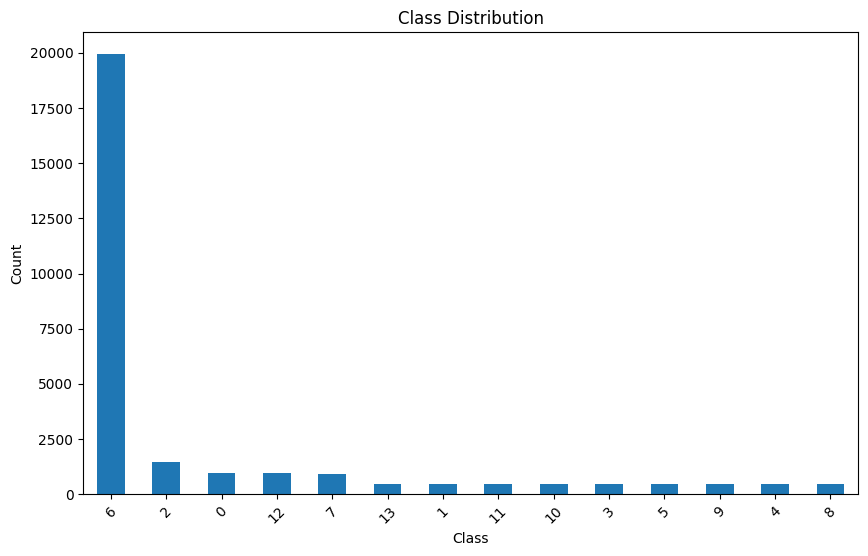

In [ ]:
class_counts = y_label_4.value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The `label_04` is imbalanced beacuse some classes having significantly fewer samples than others. For improve the performance using resampling.

**Applying Resampling:**

In [ ]:
# Oversampling usign SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled_label_4, y_resampled_label_4 = smote.fit_resample(X_label_4, y_label_4)

# Visualize the class distribution after oversampling
print("Class distribution before oversampling:", Counter(y_label_4))
print("Class distribution after oversampling:", Counter(y_resampled_label_4))

Class distribution before oversampling: Counter({6: 19938, 2: 1449, 0: 955, 12: 954, 7: 938, 13: 482, 1: 481, 11: 480, 10: 480, 3: 479, 5: 478, 9: 472, 4: 469, 8: 465})
Class distribution after oversampling: Counter({6: 19938, 13: 19938, 4: 19938, 5: 19938, 1: 19938, 2: 19938, 7: 19938, 3: 19938, 0: 19938, 12: 19938, 9: 19938, 8: 19938, 11: 19938, 10: 19938})


Check accuracy before any feature selection

In [ ]:
# KNN Classification Model
k=7
knn_model_label_4 = KNeighborsClassifier(n_neighbors=k)
knn_model_label_4.fit(X_resampled_label_4, y_resampled_label_4)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_label_4 = knn_model_label_4.predict(X_valid_label_4)
accuracy = accuracy_score(y_valid_label_4, y_pred_label_4)
print("Accuracy: ", accuracy)

Accuracy:  0.98


In [ ]:
# Predict label 4 before feature engineering for test dataset
y_pred_label_4_before = knn_model_label_4.predict(X_test_label_4)

Use Principal component analysis

In [ ]:
from sklearn.decomposition import PCA

pca_label_4 = PCA(n_components=0.90, svd_solver='full')
pca_label_4.fit(X_resampled_label_4)
X_train_trf_label_4 = pd.DataFrame(pca_label_4.transform(X_resampled_label_4))
X_valid_trf_label_4 = pd.DataFrame(pca_label_4.transform(X_valid_label_4))
X_test_trf_label_4 = pd.DataFrame(pca_label_4.transform(X_test_label_4))
X_train_trf_label_4.shape

(279132, 42)

Check accuracy after feature selection

In [ ]:
# Check accuracy again using KNN Classification Model
k=7
knn_model_label_4_new = KNeighborsClassifier(n_neighbors=k)
knn_model_label_4_new.fit(X_train_trf_label_4, y_resampled_label_4)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_label_4_new = knn_model_label_4_new.predict(X_valid_trf_label_4)
accuracy_new = accuracy_score(y_valid_label_4, y_pred_label_4_new)
print("New Accuracy: ", accuracy_new)

New Accuracy:  0.9733333333333334


In [ ]:
# Predict label 4 after feature engineering for test dataset
y_pred_label_4_after = knn_model_label_4_new.predict(X_test_trf_label_4)

write CSV file for label_4

In [ ]:
create_csv(X_test_trf_label_4, y_pred_label_4_before, y_pred_label_4_after, "label_4")

<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-103-0cb9833d3969>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat